<a href="https://www.kaggle.com/code/dinakaurchawla/hcde-530-breast-cancer-classification?scriptVersionId=245170936" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
import sys, pathlib, os

repo = pathlib.Path("/kaggle/input/breast-cancer-classification-main")

# 1. Make its Python modules importable
sys.path.append(str(repo))

# 2. Install any Python dependencies the repo lists
req = repo / "requirements.txt"
if req.exists():
    !pip install -q -r {req}

In [3]:
# ── 1. standard imports ───────────────────────────────────────────────────────
from pathlib import Path          # pathlib is part of the standard library
import sys, os

# ── 2. point to the repo folder that Kaggle mounted ──────────────────────────
# Look in the right-hand “Data” panel → copy the exact folder name.
# For a public repo it’s usually <repo-name>-<branch>, all lower-case.
repo_root = Path("/kaggle/input/breast-cancer-classification")   # adjust if different

# ── 3. sanity-check: list the first few files ────────────────────────────────
!find $repo_root -maxdepth 2 -type f | head -n 20

/kaggle/input/breast-cancer-classification/Random Forest/Data_RF.csv
/kaggle/input/breast-cancer-classification/Random Forest/Random_Forests (Visualisations).ipynb
/kaggle/input/breast-cancer-classification/README.md
/kaggle/input/breast-cancer-classification/BC_Classification.ipynb
/kaggle/input/breast-cancer-classification/Decision Tree/Decision_Tree (Visualisation).ipynb
/kaggle/input/breast-cancer-classification/Decision Tree/Data.csv
/kaggle/input/breast-cancer-classification/.gitattributes
/kaggle/input/breast-cancer-classification/data.csv


In [4]:
!ls $repo_root

 BC_Classification.ipynb  'Decision Tree'   README.md
 data.csv		  'Random Forest'


In [5]:
from pathlib import Path
import sys, runpy, inspect, subprocess

# **EDIT THIS** if the folder name in the right-hand Data pane is different
repo_root = Path("/kaggle/input/breast-cancer-classification")

In [6]:
# Writes bc_repo_script.py in the writable /kaggle/working/
subprocess.run([
    "jupyter", "nbconvert",
    "--to", "python",
    str(repo_root / "BC_Classification.ipynb"),
    "--output", "/kaggle/working/bc_repo_script"
], check=True)

[NbConvertApp] Converting notebook /kaggle/input/breast-cancer-classification/BC_Classification.ipynb to python
[NbConvertApp] Writing 7387 bytes to /kaggle/working/bc_repo_script.py


CompletedProcess(args=['jupyter', 'nbconvert', '--to', 'python', '/kaggle/input/breast-cancer-classification/BC_Classification.ipynb', '--output', '/kaggle/working/bc_repo_script'], returncode=0)

In [7]:
# Convert as before …
subprocess.run(["jupyter", "nbconvert", "--to", "python",
                str(repo_root / "BC_Classification.ipynb"),
                "--output", "/kaggle/working/bc_repo_script"], check=True)

# --- read the .py file, patch the bad line, write it back -------------------
import re, pathlib
script_file = pathlib.Path("/kaggle/working/bc_repo_script.py")
src = script_file.read_text()

patched = re.sub(
    r"\(x_data-np\.min\(x_data\)\)/\(np\.max\(x_data\)-np\.min\(x_data\)\)\.values",
    "(x_data - x_data.min(axis=0)) / (x_data.max(axis=0) - x_data.min(axis=0))",
    src, count=1)

script_file.write_text(patched)

[NbConvertApp] Converting notebook /kaggle/input/breast-cancer-classification/BC_Classification.ipynb to python
[NbConvertApp] Writing 7387 bytes to /kaggle/working/bc_repo_script.py


7398

In [8]:
import pathlib, re

# 1️⃣  Path to the converted .py script produced by nbconvert
script_file = pathlib.Path("/kaggle/working/bc_repo_script.py")

# 2️⃣  Read the file, insert "df = data" immediately after the read_csv line
src = script_file.read_text()
patched = re.sub(
    r"data\s*=\s*pd\.read_csv\('data\.csv'\)",
    r"data = pd.read_csv('data.csv')\n\ndf = data  # alias so later cells work",
    src,
    count=1,
)
script_file.write_text(patched)
print("✔ Added 'df = data' alias inside bc_repo_script.py")

✔ Added 'df = data' alias inside bc_repo_script.py


In [9]:
# 🔧 1-time patch: replace MSE[optimal_k] with the correct index lookup
import pathlib, re

script_path = pathlib.Path("/kaggle/working/bc_repo_script.py")   # nbconvert output
src = script_path.read_text()

# Change only the first occurrence (that print line)
patched = re.sub(
    r"MSE\[\s*optimal_k\s*\]",
    "MSE[neighbours.index(optimal_k)]",
    src,
    count=1
)

script_path.write_text(patched)
print("✔ Patched bc_repo_script.py – IndexError fixed")

✔ Patched bc_repo_script.py – IndexError fixed


(569, 33)
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_

diagnosis
0    357
1    212
Name: count, dtype: int64


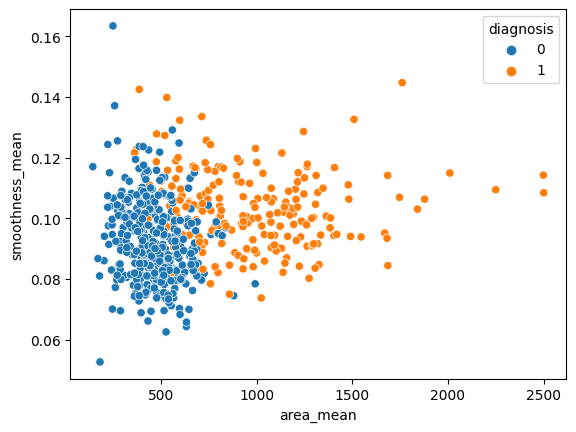

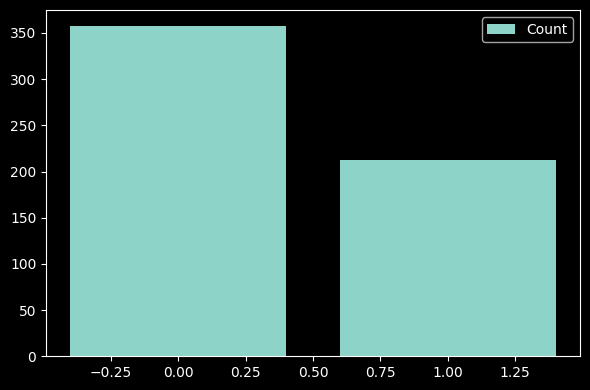

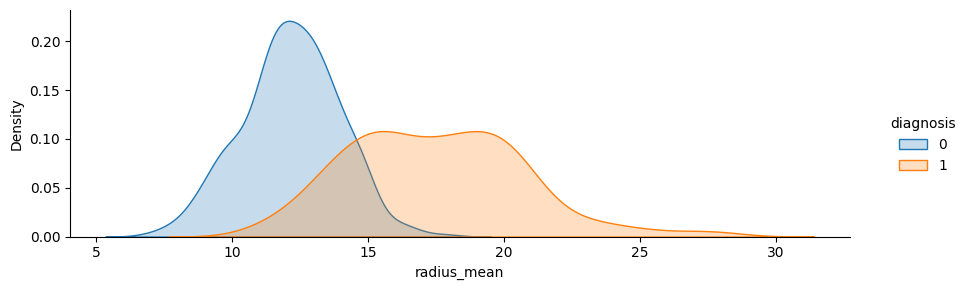

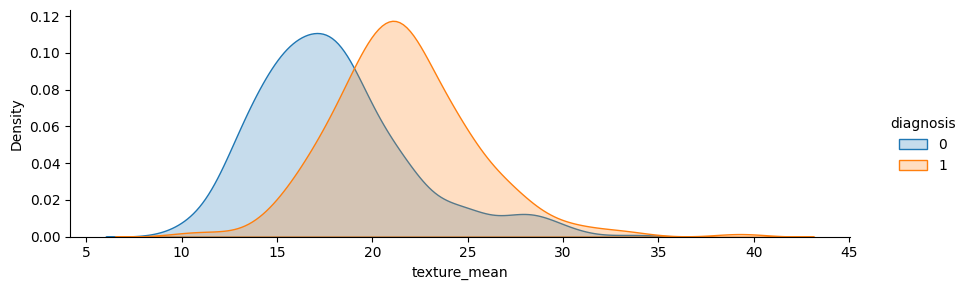

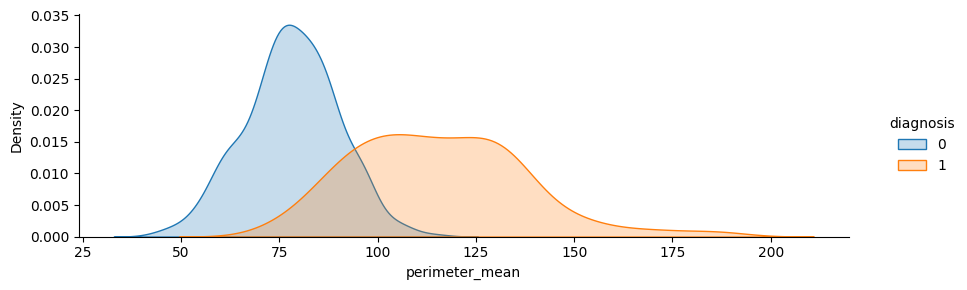

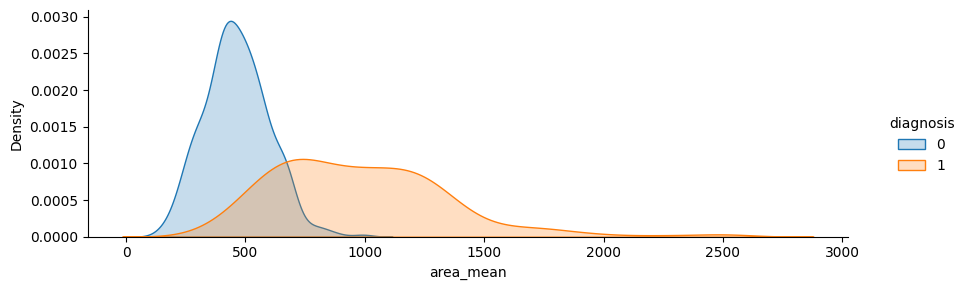

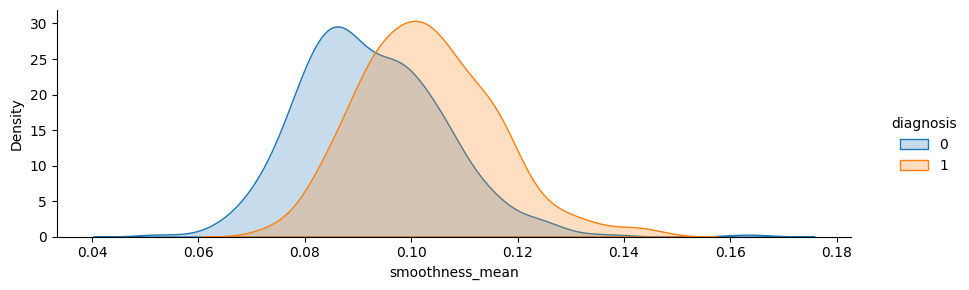

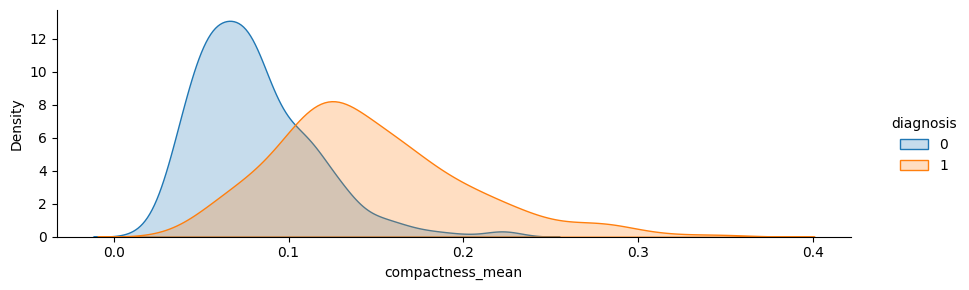

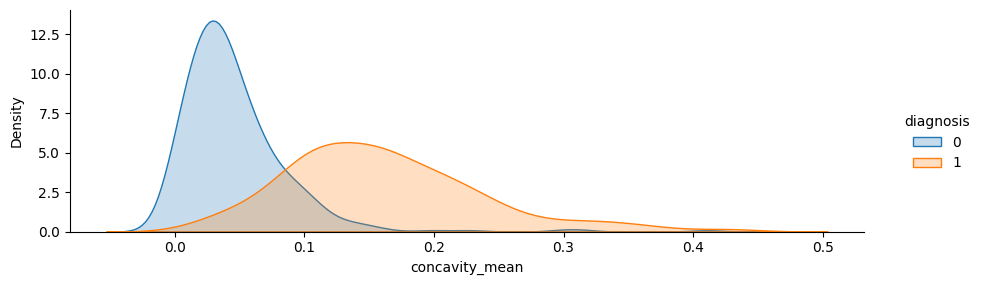

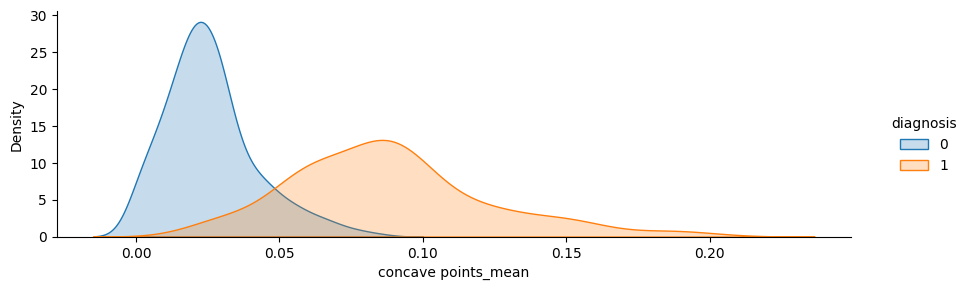

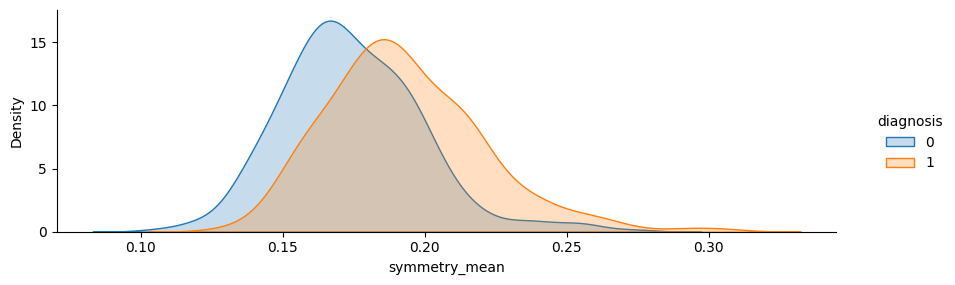

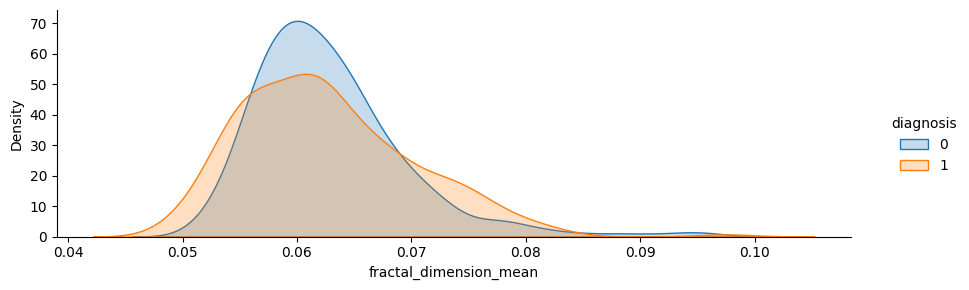

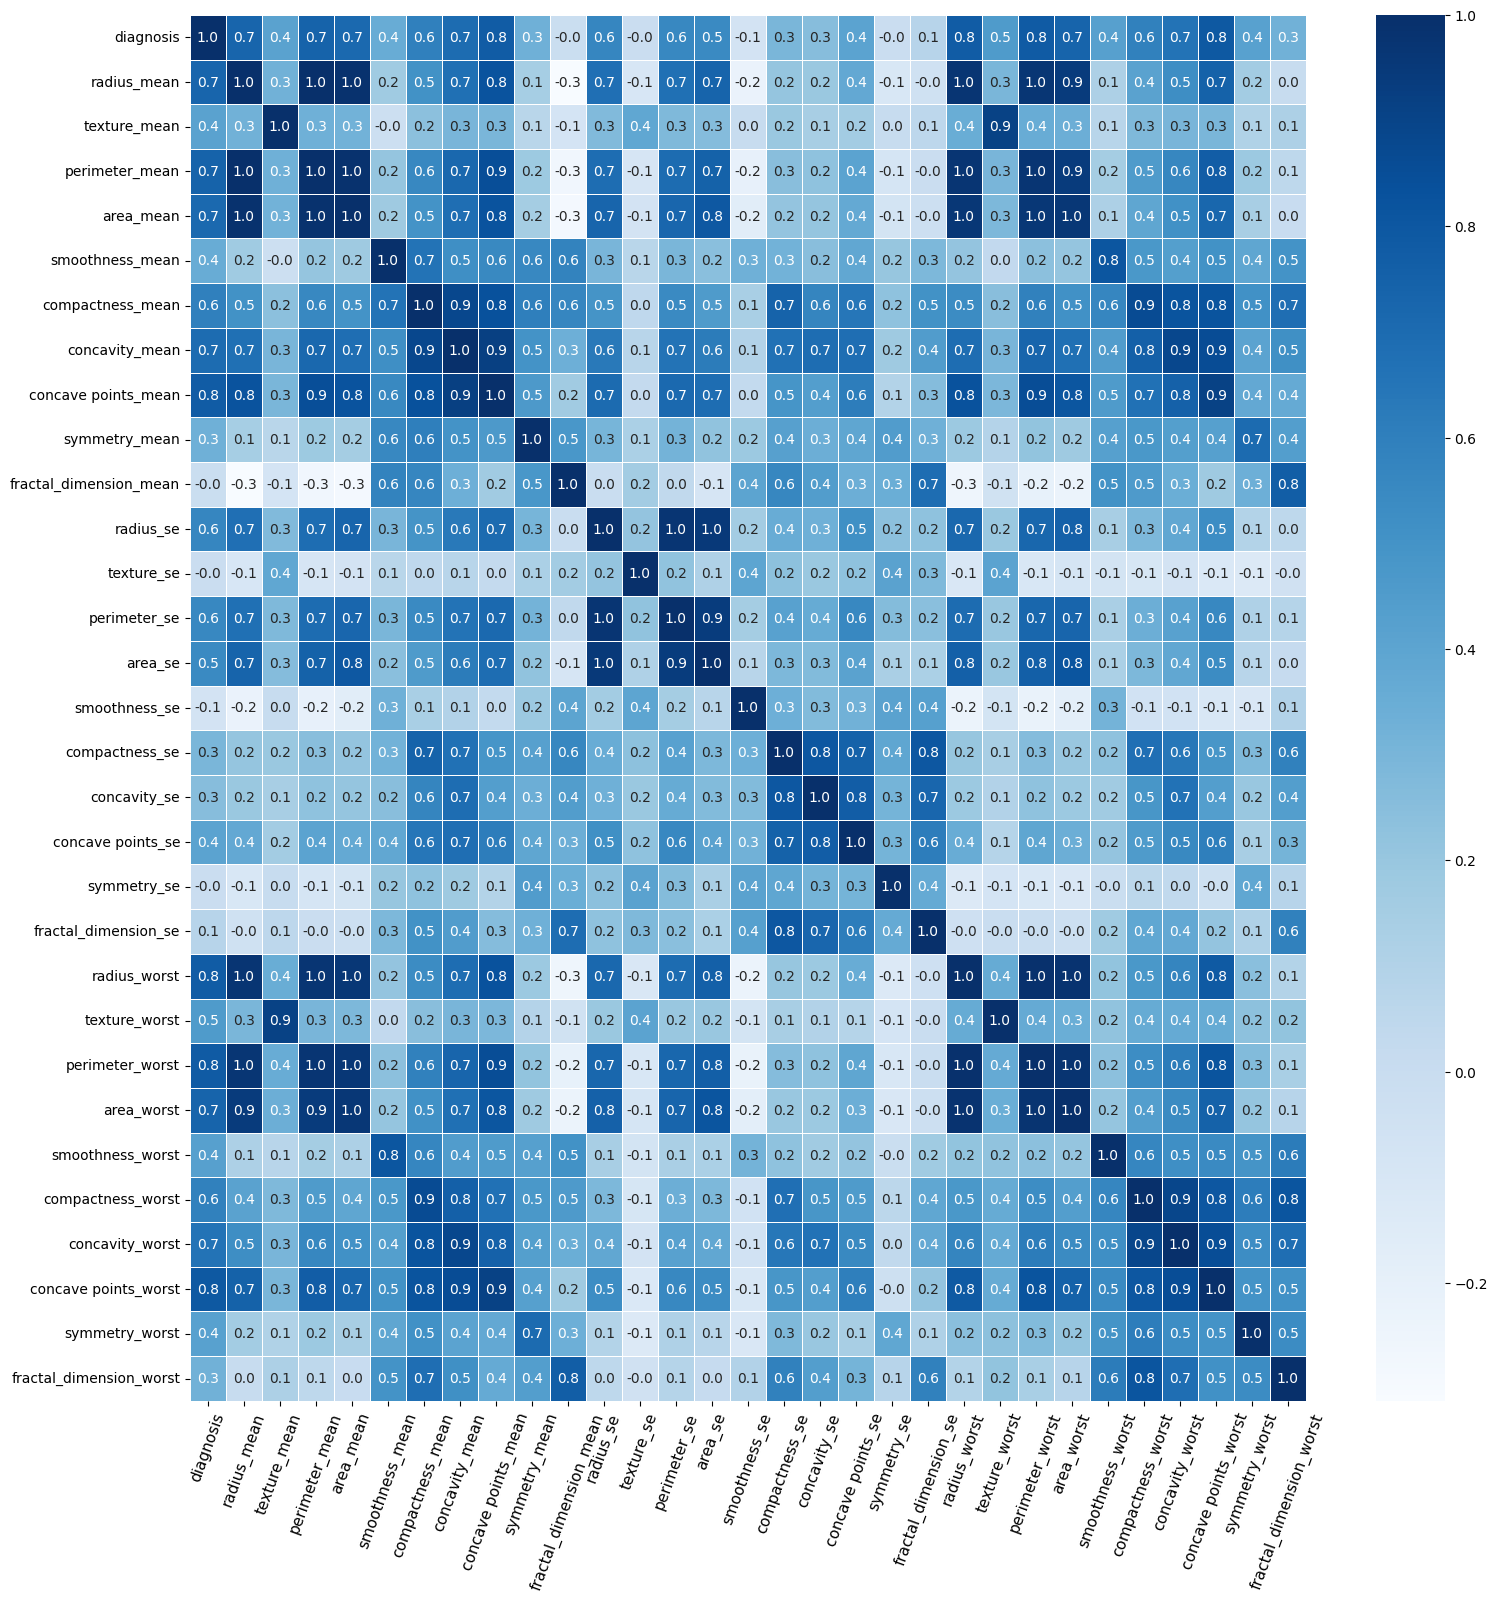

Number of neighbours :  1 , Accuracy =  0.8859649122807017
Number of neighbours :  3 , Accuracy =  0.8947368421052632
Number of neighbours :  5 , Accuracy =  0.9035087719298246
Number of neighbours :  7 , Accuracy =  0.9035087719298246
Number of neighbours :  9 , Accuracy =  0.9035087719298246
Number of neighbours :  11 , Accuracy =  0.8947368421052632
Number of neighbours :  13 , Accuracy =  0.9122807017543859
Number of neighbours :  15 , Accuracy =  0.9035087719298246
Number of neighbours :  17 , Accuracy =  0.9035087719298246
Number of neighbours :  19 , Accuracy =  0.9035087719298246
Number of neighbours :  21 , Accuracy =  0.9035087719298246
Number of neighbours :  23 , Accuracy =  0.9122807017543859
Number of neighbours :  25 , Accuracy =  0.9210526315789473
Number of neighbours :  27 , Accuracy =  0.9035087719298246
Number of neighbours :  29 , Accuracy =  0.8947368421052632
Accuracy of KNN =  0.9035087719298246
Optimal K value is: 25
Accuracy at K=25 is: 0.9210526315789473


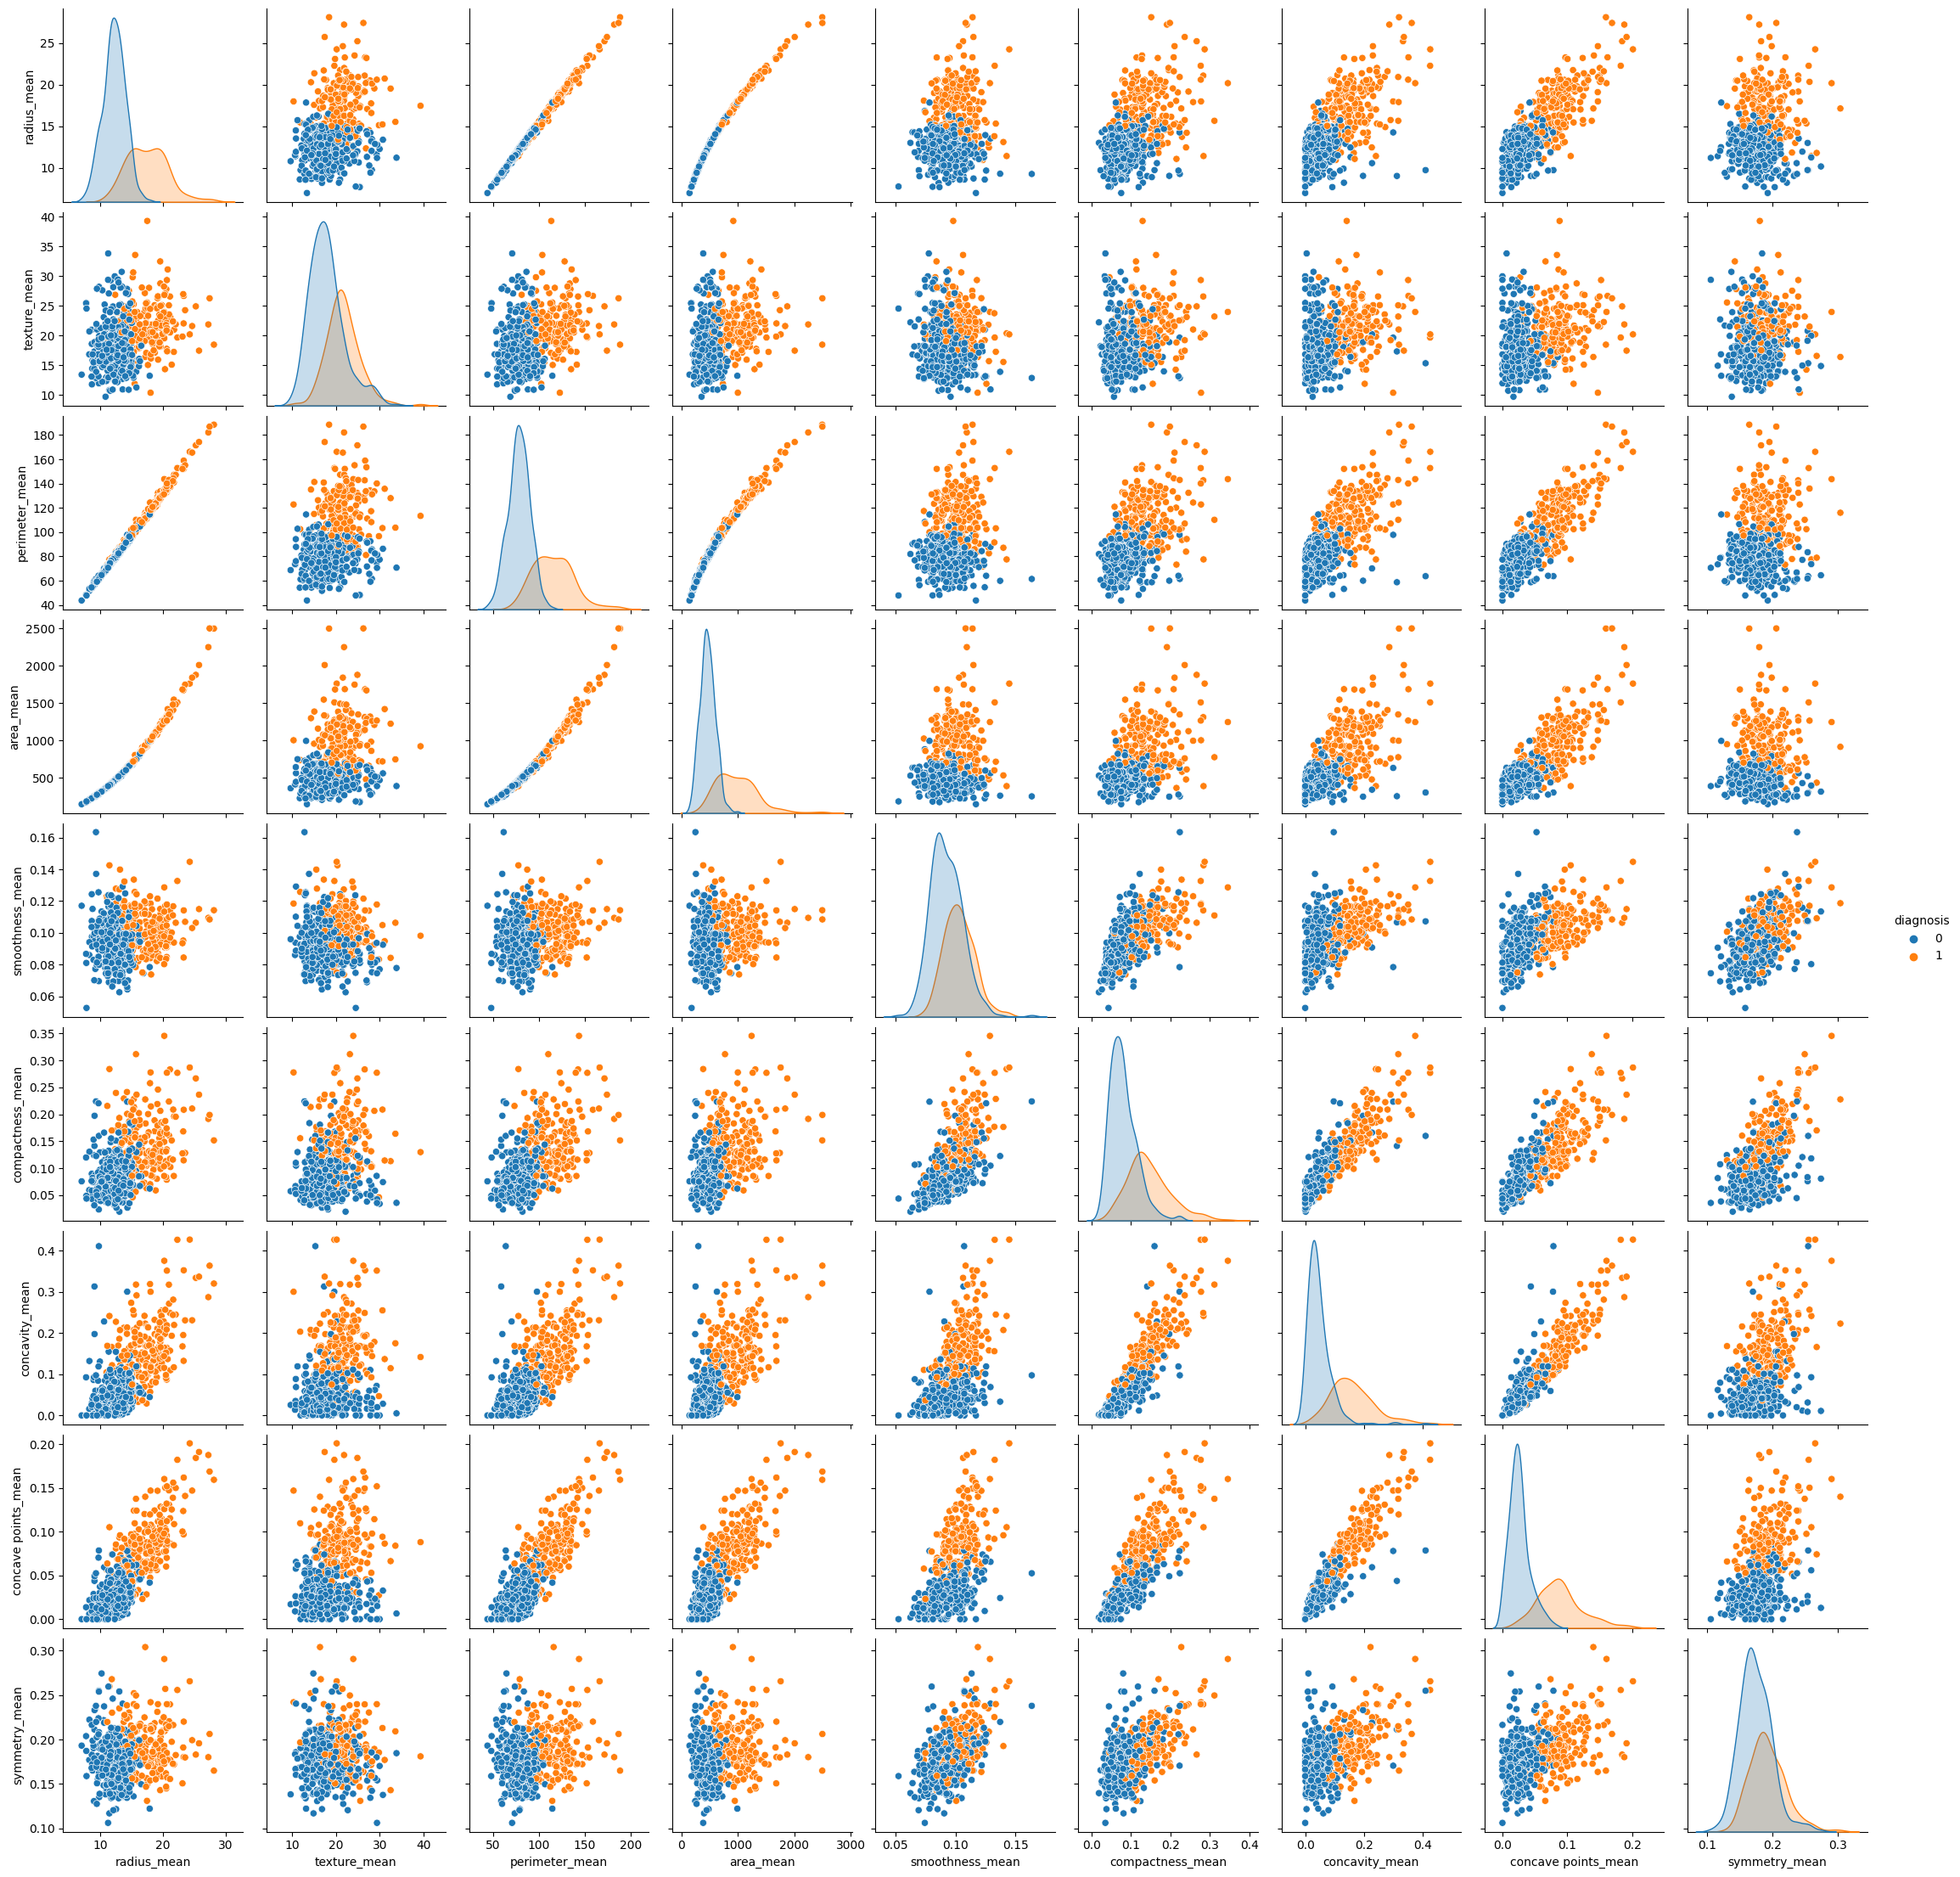

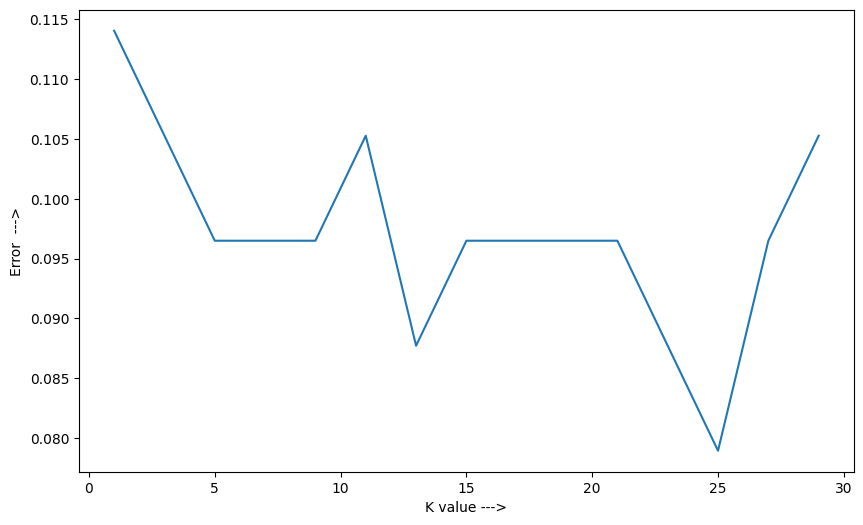

🟢  Candidate model variables:

🟢  Arrays/DataFrames with that same length (likely X_test / y_test):
   • data                      → shape/len = (569, 31)
   • df                        → shape/len = (569, 31)
   • y                         → shape/len = (569,)
   • x_data                    → shape/len = (569, 30)
   • x                         → shape/len = (569, 30)
   • shuffle_df                → shape/len = (569, 31)


In [10]:
# ── Execute the converted script with the right working directory ──
import os, runpy, pandas as pd, numpy as np
from pathlib import Path
from sklearn.base import BaseEstimator

repo_root = Path("/kaggle/input/breast-cancer-classification")   # edit if different
script_path = "/kaggle/working/bc_repo_script.py"                     # produced by nbconvert

cwd = os.getcwd()                 # remember where we started
os.chdir(repo_root)               # now 'data.csv' is in "."

try:
    ns = runpy.run_path(script_path)   # run the notebook code ➜ namespace dict
finally:
    os.chdir(cwd)                # ALWAYS go back, even if an error occurs

# ── Quick inspection of what the notebook created ───────────────────────────
model_candidates = {k: v for k, v in ns.items() if isinstance(v, BaseEstimator)}
print("🟢  Candidate model variables:")
for name, est in model_candidates.items():
    print(f"   • {name:25s} → {est.__class__.__name__}")

arrays = {k: v for k, v in ns.items()
          if isinstance(v, (pd.DataFrame, np.ndarray, list))}
first_len = len(next(iter(arrays.values()))) if arrays else None
print("\n🟢  Arrays/DataFrames with that same length (likely X_test / y_test):")
for name, arr in arrays.items():
    if len(arr) == first_len:
        print(f"   • {name:25s} → shape/len = {getattr(arr, 'shape', len(arr))}")

In [11]:
# 🔧 Install Streamlit (and joblib) FOR THIS NOTEBOOK KERNEL
import sys, importlib.util, subprocess

subprocess.run([sys.executable, "-m", "pip", "install", "-qU", "streamlit", "joblib"])

# ✅ quick sanity-check
print("Streamlit found:", importlib.util.find_spec("streamlit") is not None)
print("Python path     :", sys.executable)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 10.3 MB/s eta 0:00:00
Streamlit found: True
Python path     : /usr/bin/python3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.9.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [12]:
import pandas as pd
from pathlib import Path

# 1. Point to the real file inside the mounted dataset
DATA_PATH = Path("/kaggle/input/breast-cancer-classification")  # adjust folder name
CSV_FILE  = next(DATA_PATH.glob("*.csv"))                       # finds the first .csv
print("Reading:", CSV_FILE)

df = pd.read_csv(CSV_FILE)

Reading: /kaggle/input/breast-cancer-classification/data.csv


In [13]:
raw_csv = (
    "https://raw.githubusercontent.com/"
    "dinachawla/Breast-Cancer-Classification/main/data.csv"
)

import pandas as pd
df = pd.read_csv(raw_csv)

print(df.shape)   # quick sanity-check
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [14]:
# train_model.ipynb  – run this once
import pandas as pd
import joblib
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# ------------------------------------------------------------------
# 1 · Load data
# ------------------------------------------------------------------
CSV_URL = (
    "https://raw.githubusercontent.com/"
    "dinachawla/Breast-Cancer-Classification/main/data.csv"
)
df = pd.read_csv(CSV_URL)

# Optional: drop a non-numeric ID column if it exists
if "id" in df.columns:
    df = df.drop(columns=["id"])

X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# ------------------------------------------------------------------
# 2 · Train/validation split
# ------------------------------------------------------------------
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# ------------------------------------------------------------------
# 3 · Build preprocessing + model pipeline
# ------------------------------------------------------------------
pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    MinMaxScaler(),
    KNeighborsClassifier(n_neighbors=7)
)

pipe.fit(X_tr, y_tr)
print(f"Test accuracy: {pipe.score(X_te, y_te):.3f}")

# ------------------------------------------------------------------
# 4 · Persist artefact
# ------------------------------------------------------------------
joblib.dump(pipe, "knn_pipe.pkl")
print("Saved pipeline ➜ knn_pipe.pkl")

Test accuracy: 0.965
Saved pipeline ➜ knn_pipe.pkl


In [15]:
%%writefile breast_cancer_knn_app.py
import streamlit as st
import joblib, numpy as np
from pathlib import Path

# ─────────────────────────────────────────────────────────────
# Resolve the model file regardless of environment
# ─────────────────────────────────────────────────────────────
if "__file__" in globals():
    MODEL_PATH = Path(__file__).with_name("knn_pipe.pkl")
else:                                   # running inside a notebook
    MODEL_PATH = Path("knn_pipe.pkl").resolve()

@st.cache_resource
def load_pipe():
    return joblib.load(MODEL_PATH)

pipe = load_pipe()

FEATURES = [
    "radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean",
    "compactness_mean","concavity_mean","concave points_mean","symmetry_mean",
    "fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se",
    "smoothness_se","compactness_se","concavity_se","concave points_se",
    "symmetry_se","fractal_dimension_se","radius_worst","texture_worst",
    "perimeter_worst","area_worst","smoothness_worst","compactness_worst",
    "concavity_worst","concave points_worst","symmetry_worst",
    "fractal_dimension_worst",
]

st.set_page_config("Breast-Cancer K-N N Demo", layout="wide")
st.title("🩺 Breast-Cancer Diagnosis — K-Nearest Neighbours")

cols = st.columns(3)
user_vals = [
    st.number_input(f, min_value=0.0, value=0.0, step=0.001, format="%.4f",
                    key=f)               # key avoids Streamlit duplicates
    for f in FEATURES
]

if st.button("Predict"):
    proba = pipe.predict_proba([user_vals])[0, 1]
    label = "Malignant" if proba >= 0.5 else "Benign"

    st.metric("Prediction", label)
    st.progress(proba)
    st.write(f"Probability of malignancy: **{proba*100:.1f}%**")

Writing breast_cancer_knn_app.py


In [16]:
import streamlit as st
import joblib, numpy as np
from pathlib import Path

# ───────────────────────────────────────────────────────────────────────────
# Resolve the model file regardless of environment
# ───────────────────────────────────────────────────────────────────────────
if "__file__" in globals():
    MODEL_PATH = Path(__file__).with_name("knn_pipe.pkl")
else:                                  # e.g. running in a notebook cell
    MODEL_PATH = Path("knn_pipe.pkl").resolve()

@st.cache_resource
def load_pipe():
    return joblib.load(MODEL_PATH)

pipe = load_pipe()

FEATURES = [                     # same order as training
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
    "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean",
    "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se",
    "smoothness_se", "compactness_se", "concavity_se", "concave points_se",
    "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst",
    "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst",
    "concavity_worst", "concave points_worst", "symmetry_worst",
    "fractal_dimension_worst",
]

st.set_page_config("Breast-Cancer K-NN Demo", layout="wide")
st.title("🩺 Breast-Cancer Diagnosis — K-Nearest Neighbours")

cols = st.columns(3)
user_vals = []
for i, feat in enumerate(FEATURES):
    with cols[i % 3]:
        val = st.number_input(feat, min_value=0.0, value=0.0, step=0.001, format="%.4f")
        user_vals.append(val)

if st.button("Predict"):
    proba = pipe.predict_proba([user_vals])[0, 1]
    label = "Malignant" if proba >= 0.5 else "Benign"

    st.metric("Prediction", label)
    st.progress(proba)
    st.write(f"Probability of malignancy: **{proba*100:.1f}%**")

2025-06-13 01:20:04.512 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 01:20:04.856 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-13 01:20:04.857 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 01:20:04.858 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 01:20:04.862 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 01:20:04.862 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 01:20:04.863 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 01:20:04.865 Thread 'MainThread': mi

In [17]:
!ps aux | grep streamlit | grep -v grep

In [18]:
%%bash
# 1. (re-)install streamlit if you need it
pip install -q streamlit

# 2. fire off Streamlit into the background and detach it
nohup streamlit run /kaggle/working/breast_cancer_knn_app.py \
  --server.address 0.0.0.0 \
  --server.port 8501 \
  --server.headless true \
  > /kaggle/working/streamlit.log 2>&1 &

echo "▶️ Streamlit should now be running (logs → /kaggle/working/streamlit.log)"

▶️ Streamlit should now be running (logs → /kaggle/working/streamlit.log)


In [19]:
import subprocess, time, IPython.display as ipd

# Kill anything already on the port
subprocess.run("fuser -k 8501/tcp || true", shell=True)

# Start Streamlit in the background
proc = subprocess.Popen(
    ["streamlit", "run", "breast_cancer_knn_app.py",
     "--server.address", "0.0.0.0",
     "--server.port", "8501",
     "--server.headless", "true"],
    stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True
)

# Wait a few seconds, then show it
time.sleep(5)
app_path = "/proxy/8501/"
ipd.display(ipd.HTML(f'<a target="_blank" href="{app_path}">🔗 Open the Streamlit app</a>'))
ipd.display(ipd.IFrame(src=app_path, width="100%", height=700))

In [20]:
!ls -lh /kaggle/working

total 132K
-rw-r--r-- 1 root root 7.3K Jun 13 01:19 bc_repo_script.py
-rw-r--r-- 1 root root 2.0K Jun 13 01:20 breast_cancer_knn_app.py
-rw-r--r-- 1 root root 115K Jun 13 01:20 knn_pipe.pkl
-rw-r--r-- 1 root root  170 Jun 13 01:20 streamlit.log
